# Lung Cancer Prediction Model

Predicts lung cancer risk based on demographic and lifestyle factors.

**Features:** Gender, Age, Smoking, Yellow Fingers, Anxiety, Peer Pressure, Chronic Disease, Fatigue, Allergy, Wheezing, Alcohol, Coughing, Shortness of Breath, Swallowing Difficulty, Chest Pain  
**Target:** YES/NO (Lung Cancer)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, roc_auc_score, precision_score, recall_score, f1_score
)
import joblib

# Set plot styles
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Libraries loaded!")

✓ Libraries loaded!


## Load Dataset

**Note:** The lung cancer dataset is available at `Frontend/data/lung_cancer.csv`

In [2]:
# Load dataset
df = pd.read_csv('../Frontend/data/lung_cancer.csv')

print(f"Dataset shape: {df.shape}")
display(df.head())
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nTarget distribution:")
print(df['LUNG_CANCER'].value_counts())

Dataset shape: (309, 16)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONICDISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOLCONSUMING,COUGHING,SHORTNESSOFBREATH,SWALLOWINGDIFFICULTY,CHESTPAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO



Columns: ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONICDISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOLCONSUMING', 'COUGHING', 'SHORTNESSOFBREATH', 'SWALLOWINGDIFFICULTY', 'CHESTPAIN', 'LUNG_CANCER']

Target distribution:
LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64


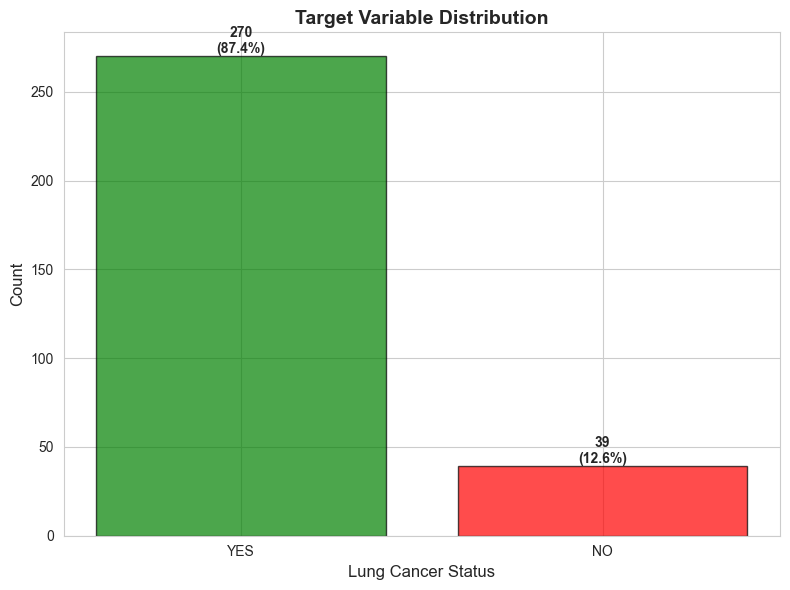

In [3]:
# Target distribution visualization
fig, ax = plt.subplots(figsize=(8, 6))
target_counts = df['LUNG_CANCER'].value_counts()
colors = ['green', 'red']
bars = ax.bar(target_counts.index, target_counts.values, color=colors, alpha=0.7, edgecolor='black')
ax.set_xlabel('Lung Cancer Status', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Target Variable Distribution', fontsize=14, fontweight='bold')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}\n({height/len(df)*100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## EDA

In [4]:
print("Dataset Info:")
print(df.info())
print("\nStatistical Summary:")
display(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   GENDER                309 non-null    object
 1   AGE                   309 non-null    int64 
 2   SMOKING               309 non-null    int64 
 3   YELLOW_FINGERS        309 non-null    int64 
 4   ANXIETY               309 non-null    int64 
 5   PEER_PRESSURE         309 non-null    int64 
 6   CHRONICDISEASE        309 non-null    int64 
 7   FATIGUE               309 non-null    int64 
 8   ALLERGY               309 non-null    int64 
 9   WHEEZING              309 non-null    int64 
 10  ALCOHOLCONSUMING      309 non-null    int64 
 11  COUGHING              309 non-null    int64 
 12  SHORTNESSOFBREATH     309 non-null    int64 
 13  SWALLOWINGDIFFICULTY  309 non-null    int64 
 14  CHESTPAIN             309 non-null    int64 
 15  LUNG_CANCER           309 

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONICDISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOLCONSUMING,COUGHING,SHORTNESSOFBREATH,SWALLOWINGDIFFICULTY,CHESTPAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000



Missing values:
GENDER                  0
AGE                     0
SMOKING                 0
YELLOW_FINGERS          0
ANXIETY                 0
PEER_PRESSURE           0
CHRONICDISEASE          0
FATIGUE                 0
ALLERGY                 0
WHEEZING                0
ALCOHOLCONSUMING        0
COUGHING                0
SHORTNESSOFBREATH       0
SWALLOWINGDIFFICULTY    0
CHESTPAIN               0
LUNG_CANCER             0
dtype: int64


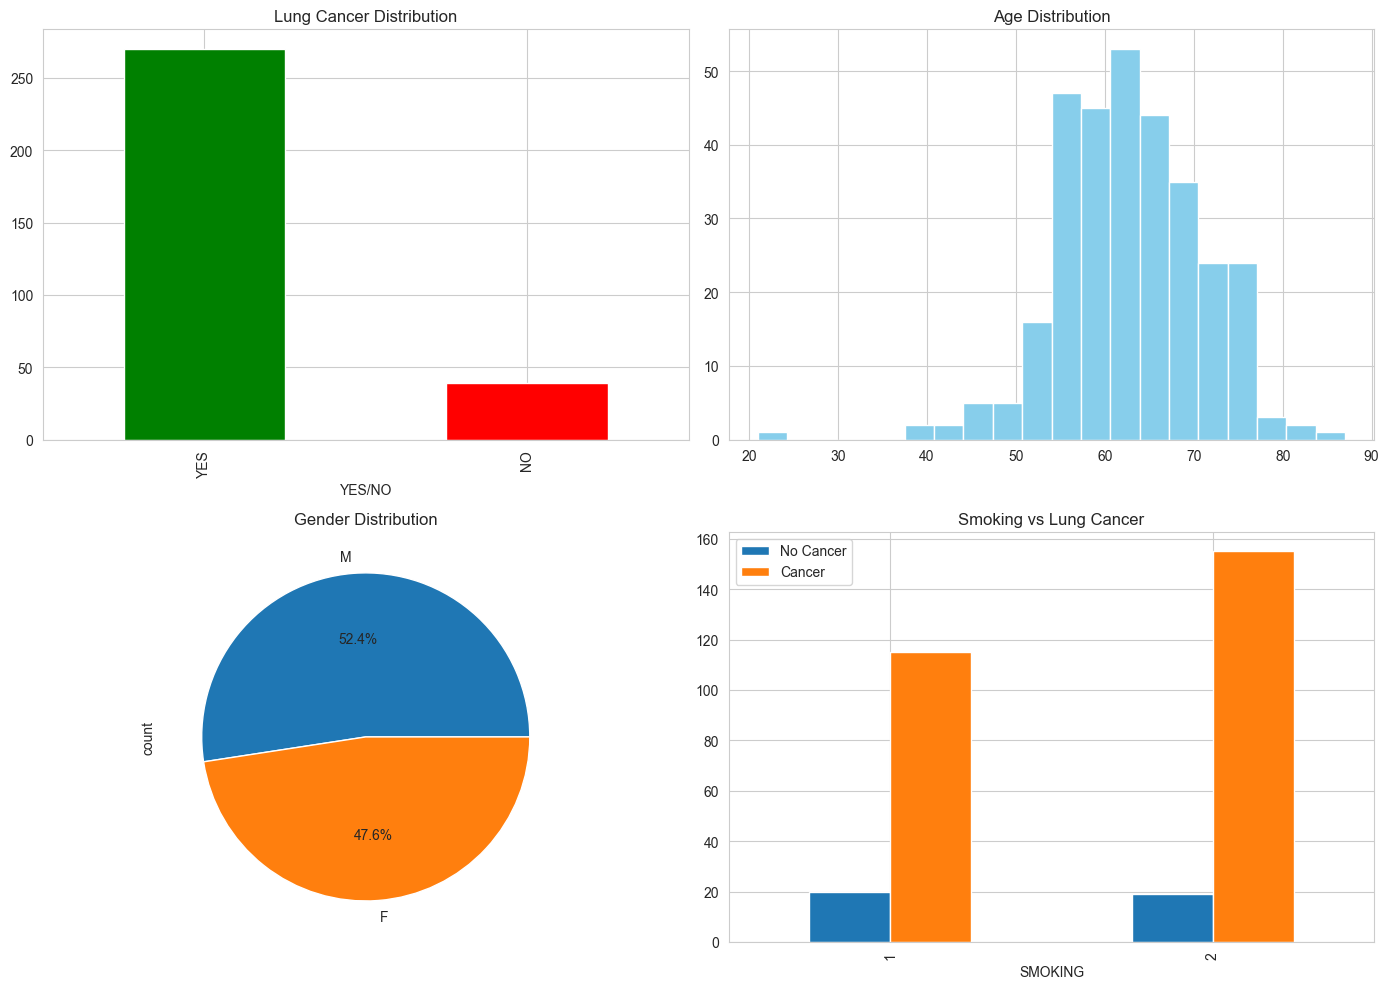

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Target distribution
df['LUNG_CANCER'].value_counts().plot(kind='bar', ax=axes[0,0], color=['green', 'red'])
axes[0,0].set_title('Lung Cancer Distribution')
axes[0,0].set_xlabel('YES/NO')

# Age distribution
df['AGE'].hist(bins=20, ax=axes[0,1], color='skyblue')
axes[0,1].set_title('Age Distribution')

# Gender distribution
df['GENDER'].value_counts().plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%')
axes[1,0].set_title('Gender Distribution')

# Smoking vs Cancer
pd.crosstab(df['SMOKING'], df['LUNG_CANCER']).plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Smoking vs Lung Cancer')
axes[1,1].legend(['No Cancer', 'Cancer'])

plt.tight_layout()
plt.show()

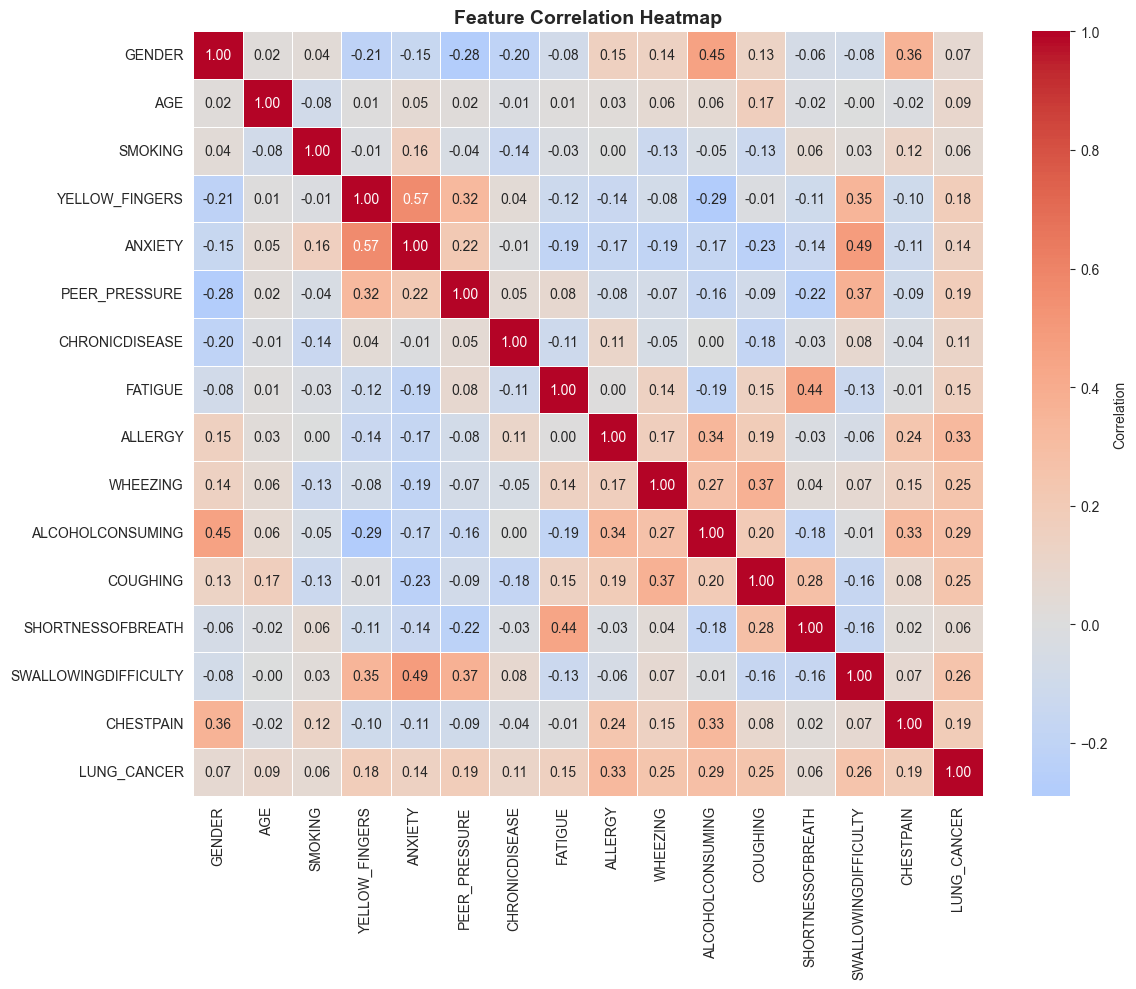


Top 5 features correlated with Lung Cancer:
ALLERGY                 0.327766
ALCOHOLCONSUMING        0.288533
SWALLOWINGDIFFICULTY    0.259730
WHEEZING                0.249300
COUGHING                0.248570
Name: LUNG_CANCER, dtype: float64


In [6]:
# Correlation heatmap of numerical features
plt.figure(figsize=(12, 10))
numeric_df = df.copy()

# Convert categorical to numeric for correlation
for col in numeric_df.columns:
    if numeric_df[col].dtype == 'object':
        le_temp = LabelEncoder()
        numeric_df[col] = le_temp.fit_transform(numeric_df[col])

correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Most correlated features with target
target_corr = correlation_matrix['LUNG_CANCER'].drop('LUNG_CANCER').sort_values(ascending=False)
print("\nTop 5 features correlated with Lung Cancer:")
print(target_corr.head())

## Preprocessing

In [7]:
# Encode categorical variables
# Gender: M -> Male, F -> Female (then encode numerically)
df['GENDER'] = df['GENDER'].map({'M': 'Male', 'F': 'Female'})

# Label encode all categorical columns
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if col != 'LUNG_CANCER':  # Don't encode target yet
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

print(f"Encoded columns: {list(label_encoders.keys())}")
print(f"\nEncoded dataset:")
display(df.head())

Encoded columns: ['GENDER']

Encoded dataset:


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONICDISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOLCONSUMING,COUGHING,SHORTNESSOFBREATH,SWALLOWINGDIFFICULTY,CHESTPAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [8]:
# Separate features and target
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Encode target (YES/NO -> 1/0)
le_target = LabelEncoder()
y = le_target.fit_transform(y)

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target classes: {le_target.classes_}")

Features shape: (309, 15)
Target shape: (309,)
Target classes: ['NO' 'YES']


In [9]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nTraining target distribution:")
print(pd.Series(y_train).value_counts())

Training set: (247, 15)
Test set: (62, 15)

Training target distribution:
1    216
0     31
Name: count, dtype: int64


## Model Training

In [10]:
# Train multiple models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, random_state=42)
}

results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name:20s} Accuracy: {acc:.4f}")

# Select best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n🏆 Best Model: {best_model_name} ({results[best_model_name]:.4f})")


Training Random Forest...
Random Forest        Accuracy: 0.9194

Training Gradient Boosting...
Gradient Boosting    Accuracy: 0.8710

🏆 Best Model: Random Forest (0.9194)
Random Forest        Accuracy: 0.9194

Training Gradient Boosting...
Gradient Boosting    Accuracy: 0.8710

🏆 Best Model: Random Forest (0.9194)


## Evaluation

Classification Report:
              precision    recall  f1-score   support

          NO       0.67      0.75      0.71         8
         YES       0.96      0.94      0.95        54

    accuracy                           0.92        62
   macro avg       0.81      0.85      0.83        62
weighted avg       0.92      0.92      0.92        62



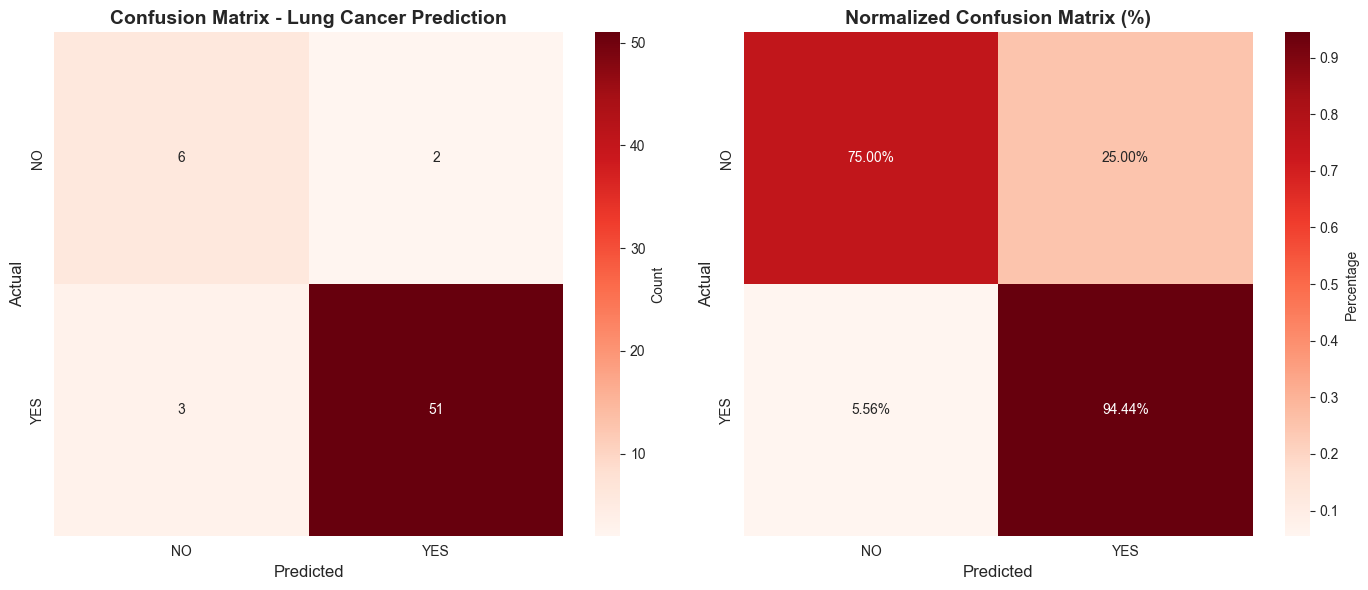


Confusion Matrix Breakdown:
  True Negatives (TN):  6 - Correctly predicted NO cancer
  False Positives (FP): 2 - Incorrectly predicted cancer
  False Negatives (FN): 3 - Missed cancer cases (⚠️ Critical)
  True Positives (TP):  51 - Correctly predicted cancer

Sensitivity (Recall): 94.44% - Ability to detect cancer
Specificity:          75.00% - Ability to rule out cancer


In [11]:
# Detailed evaluation
y_pred = best_model.predict(X_test)

print("Classification Report:")
print("="*60)
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

# Enhanced Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_,
            ax=ax1, cbar_kws={'label': 'Count'})
ax1.set_title('Confusion Matrix - Lung Cancer Prediction', fontsize=14, fontweight='bold')
ax1.set_ylabel('Actual', fontsize=12)
ax1.set_xlabel('Predicted', fontsize=12)

# Normalized confusion matrix (percentages)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Reds',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_,
            ax=ax2, cbar_kws={'label': 'Percentage'})
ax2.set_title('Normalized Confusion Matrix (%)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Actual', fontsize=12)
ax2.set_xlabel('Predicted', fontsize=12)

plt.tight_layout()
plt.show()

# Print confusion matrix breakdown
tn, fp, fn, tp = cm.ravel()
print(f"\nConfusion Matrix Breakdown:")
print(f"  True Negatives (TN):  {tn} - Correctly predicted NO cancer")
print(f"  False Positives (FP): {fp} - Incorrectly predicted cancer")
print(f"  False Negatives (FN): {fn} - Missed cancer cases (⚠️ Critical)")
print(f"  True Positives (TP):  {tp} - Correctly predicted cancer")
print(f"\nSensitivity (Recall): {tp/(tp+fn):.2%} - Ability to detect cancer")
print(f"Specificity:          {tn/(tn+fp):.2%} - Ability to rule out cancer")

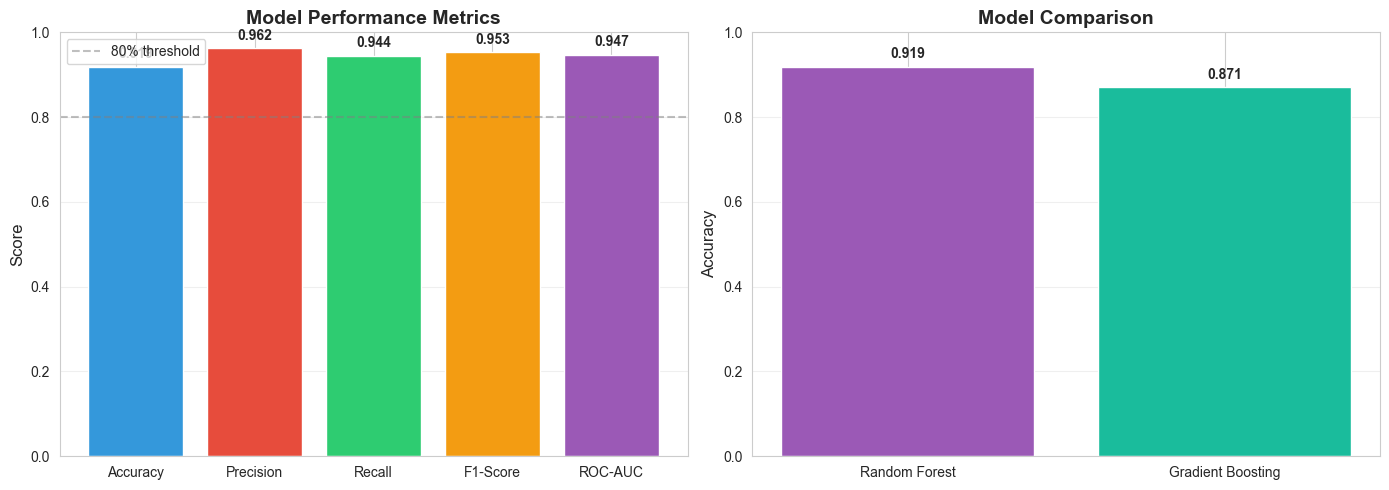


Detailed Metrics:
  Accuracy    : 0.9194
  Precision   : 0.9623
  Recall      : 0.9444
  F1-Score    : 0.9533
  ROC-AUC     : 0.9468


In [13]:
# Comprehensive metrics visualization
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, pos_label=1),
    'Recall': recall_score(y_test, y_pred, pos_label=1),
    'F1-Score': f1_score(y_test, y_pred, pos_label=1)
}

# Add ROC-AUC if model supports probability predictions
if hasattr(best_model, 'predict_proba'):
    y_proba = best_model.predict_proba(X_test)[:, 1]
    metrics['ROC-AUC'] = roc_auc_score(y_test, y_proba)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot of metrics
colors_map = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']
bars = ax1.bar(metrics.keys(), metrics.values(), color=colors_map[:len(metrics)])
ax1.set_ylim([0, 1])
ax1.set_ylabel('Score', fontsize=12)
ax1.set_title('Model Performance Metrics', fontsize=14, fontweight='bold')
ax1.axhline(y=0.8, color='gray', linestyle='--', alpha=0.5, label='80% threshold')
ax1.grid(axis='y', alpha=0.3)
ax1.legend()

for i, (key, value) in enumerate(metrics.items()):
    ax1.text(i, value + 0.02, f'{value:.3f}', ha='center', fontweight='bold', fontsize=10)

# Model comparison
ax2.bar(results.keys(), results.values(), color=['#9b59b6', '#1abc9c'])
ax2.set_ylim([0, 1])
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Model Comparison', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

for i, (key, value) in enumerate(results.items()):
    ax2.text(i, value + 0.02, f'{value:.3f}', ha='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

print("\nDetailed Metrics:")
for metric, value in metrics.items():
    print(f"  {metric:12s}: {value:.4f}")

### Performance Metrics Visualization

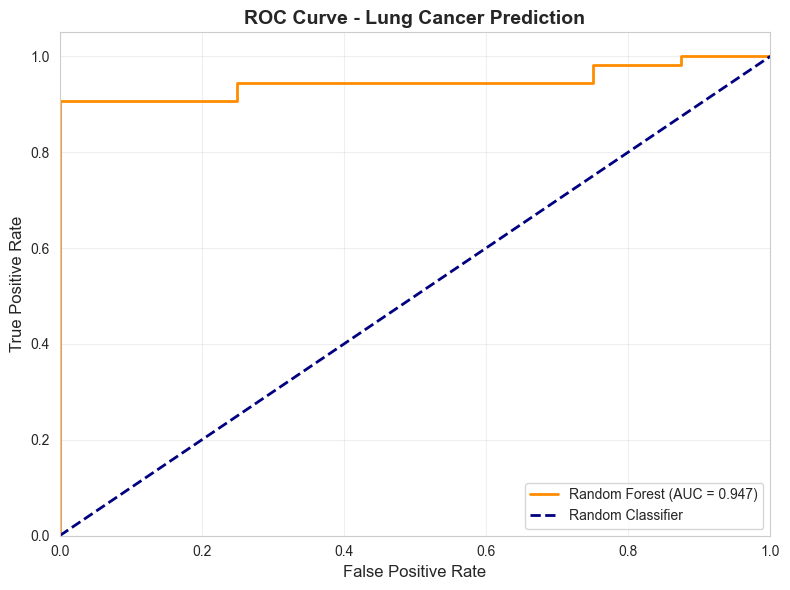


Area Under ROC Curve (AUC): 0.9468
Interpretation: Excellent discrimination


In [14]:
# ROC Curve for the best model
if hasattr(best_model, 'predict_proba'):
    y_proba = best_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'{best_model_name} (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('ROC Curve - Lung Cancer Prediction', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nArea Under ROC Curve (AUC): {roc_auc:.4f}")
    print(f"Interpretation: {'Excellent' if roc_auc > 0.9 else 'Good' if roc_auc > 0.8 else 'Fair'} discrimination")

### ROC Curve Analysis

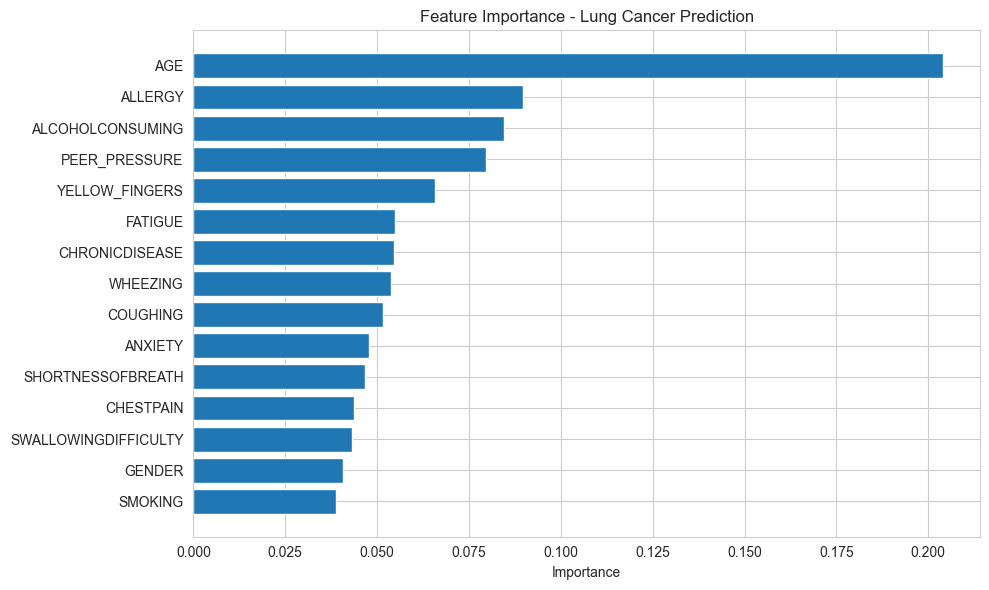


Top 5 Important Features:
         feature  importance
             AGE    0.203876
         ALLERGY    0.089843
ALCOHOLCONSUMING    0.084597
   PEER_PRESSURE    0.079557
  YELLOW_FINGERS    0.065880


In [15]:
# Feature importance
if hasattr(best_model, 'feature_importances_'):
    importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['feature'], importance_df['importance'])
    plt.xlabel('Importance')
    plt.title('Feature Importance - Lung Cancer Prediction')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("\nTop 5 Important Features:")
    print(importance_df.head().to_string(index=False))

## Save Model

In [16]:
# Save model and encoders
joblib.dump(best_model, '../Frontend/models/lung_cancer_model.sav')
joblib.dump(label_encoders, '../Frontend/models/lung_cancer_encoders.sav')
joblib.dump(le_target, '../Frontend/models/lung_cancer_target_encoder.sav')

print("✓ Model saved to: ../Frontend/models/lung_cancer_model.sav")
print("✓ Encoders saved!")
print("\n" + "="*60)
print("🎉 TRAINING COMPLETE!")
print("="*60)

✓ Model saved to: ../Frontend/models/lung_cancer_model.sav
✓ Encoders saved!

🎉 TRAINING COMPLETE!
